**Loading Required Packages and Setting Seed**

In [1]:
library(tidyverse)
library(infer)
library(repr)
library(cowplot)
library(datateachr)
library(digest)
library(dplyr)
library(broom)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", 
              "auto-mpg.data")

In [3]:
cars <- read.table("auto-mpg.data") 
head(cars)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


*Table 1:*

In [4]:
cars <- read.table("auto-mpg.data")%>%
    rename(mpg = V1,
           cylinders = V2,
           dispacement = V3,
           horsepower = V4,
           weight = V5,
           acceleration = V6,
           model = V7,
           origin = V8,
           name = V9) %>%
    mutate(horsepower = as.numeric(horsepower),
           cylinders = as.factor(cylinders)) 
head(cars)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,mpg,cylinders,dispacement,horsepower,weight,acceleration,model,origin,name
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


*Table 2:*

In [5]:
cars_variables <- cars %>% 
    filter(!is.na(horsepower),
           cylinders %in% c(6,4))%>%
    select(cylinders, horsepower)

head(cars_variables)

,cylinders,horsepower
,<fct>,<dbl>
1,4,95
2,6,95
3,6,97
4,6,85
5,4,88
6,4,46


*Table 3:*

In [6]:
cars_summ_hp <- cars_variables %>%
    group_by(cylinders) %>%
    summarize(size = n(),
              mean = mean(horsepower),
              sd = sd(horsepower),
              minimum = min(horsepower),
              lower_quartile = quantile(horsepower, 0.25),
              median = median(horsepower),
              upper_quartile = quantile(horsepower, 0.75),
              max = max(horsepower))

cars_summ_hp

cylinders,size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,78.28141,14.52310,46,68.0,78,88,115
6,83,101.50602,14.31047,72,92.5,100,110,165


*Table 4:*

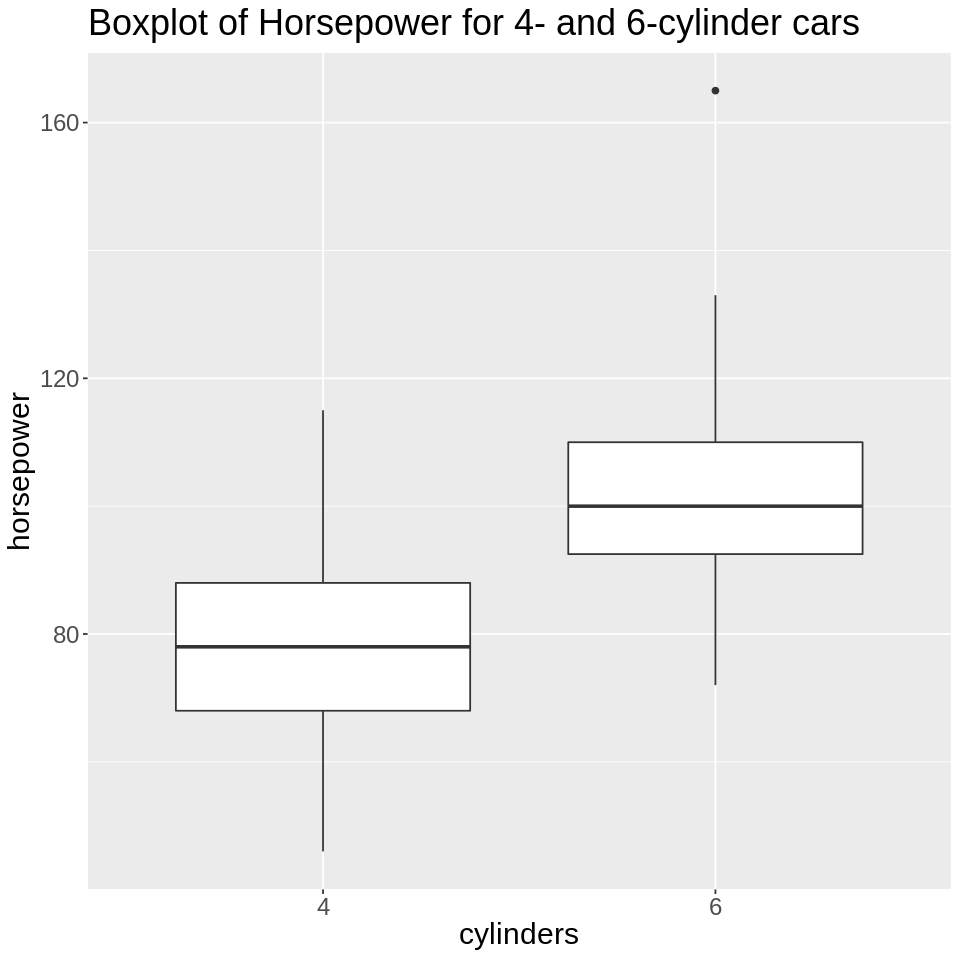

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)

cars_boxplot <- cars_variables %>%
    ggplot(aes(x= cylinders, y = horsepower)) +
    geom_boxplot()+
    ggtitle("Boxplot of Horsepower for 4- and 6-cylinder cars") +
    theme(text = element_text(size = 18))

cars_boxplot

*Graph 1: Boxplot of horsepower for 4 and 6 cylinder cars*

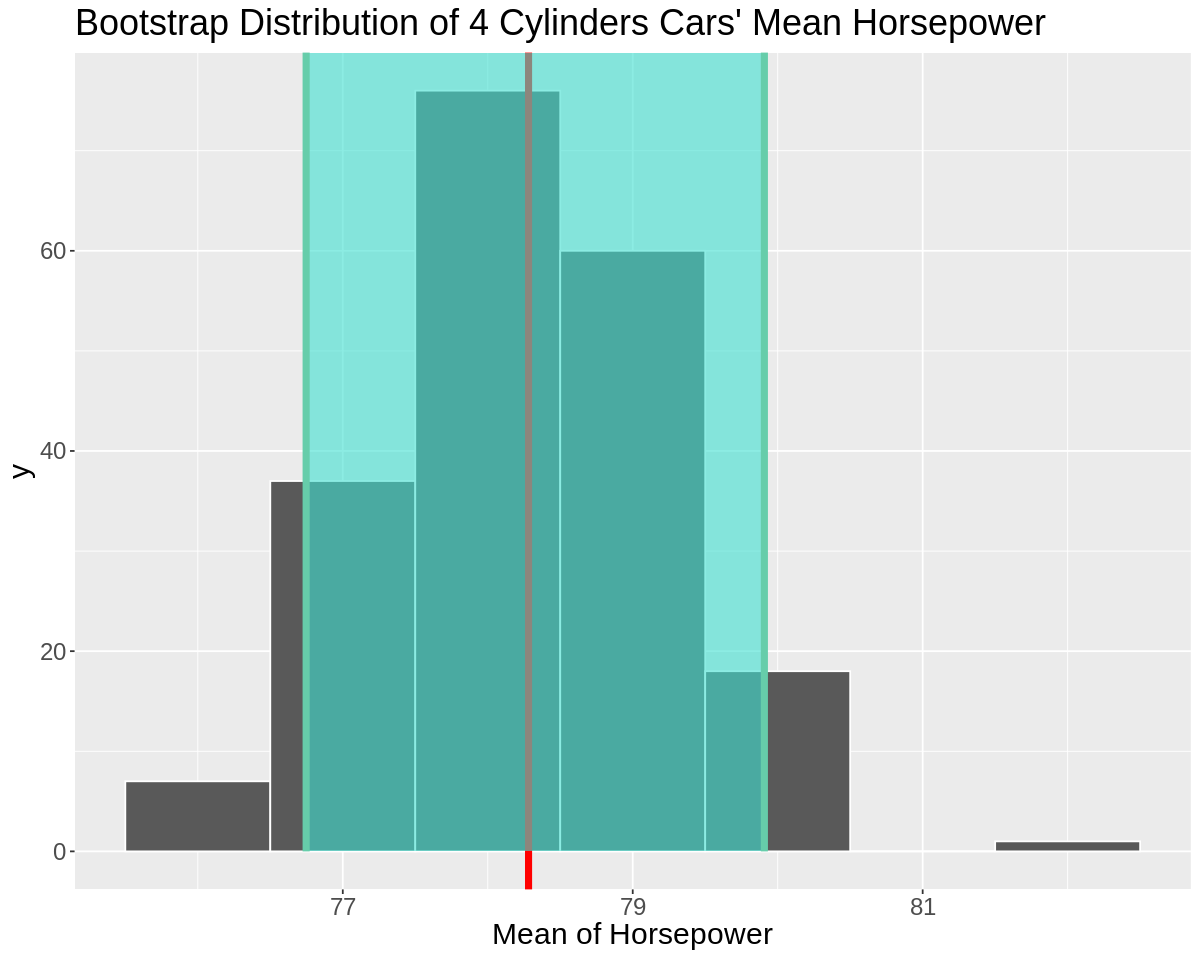

In [8]:
set.seed(1234)
options(repr.plot.width = 10, repr.plot.height = 8)

cars_bootstrapped1 <- cars_variables %>%
    filter(cylinders == "4") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 199) %>%
    calculate(stat = "mean")

cars_ci1 <- cars_bootstrapped1 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_4cylinders_plot <- cars_bootstrapped1 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_summ_hp[[1,3]], color = "red", size = 2) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 4 Cylinders Cars' Mean Horsepower") +
    theme(text = element_text(size = 18)) +
    shade_confidence_interval(endpoints = cars_ci1)

cars_4cylinders_plot

*Graph 2: Bootstrap distribution of 4 cylinders cars mean horsepower*

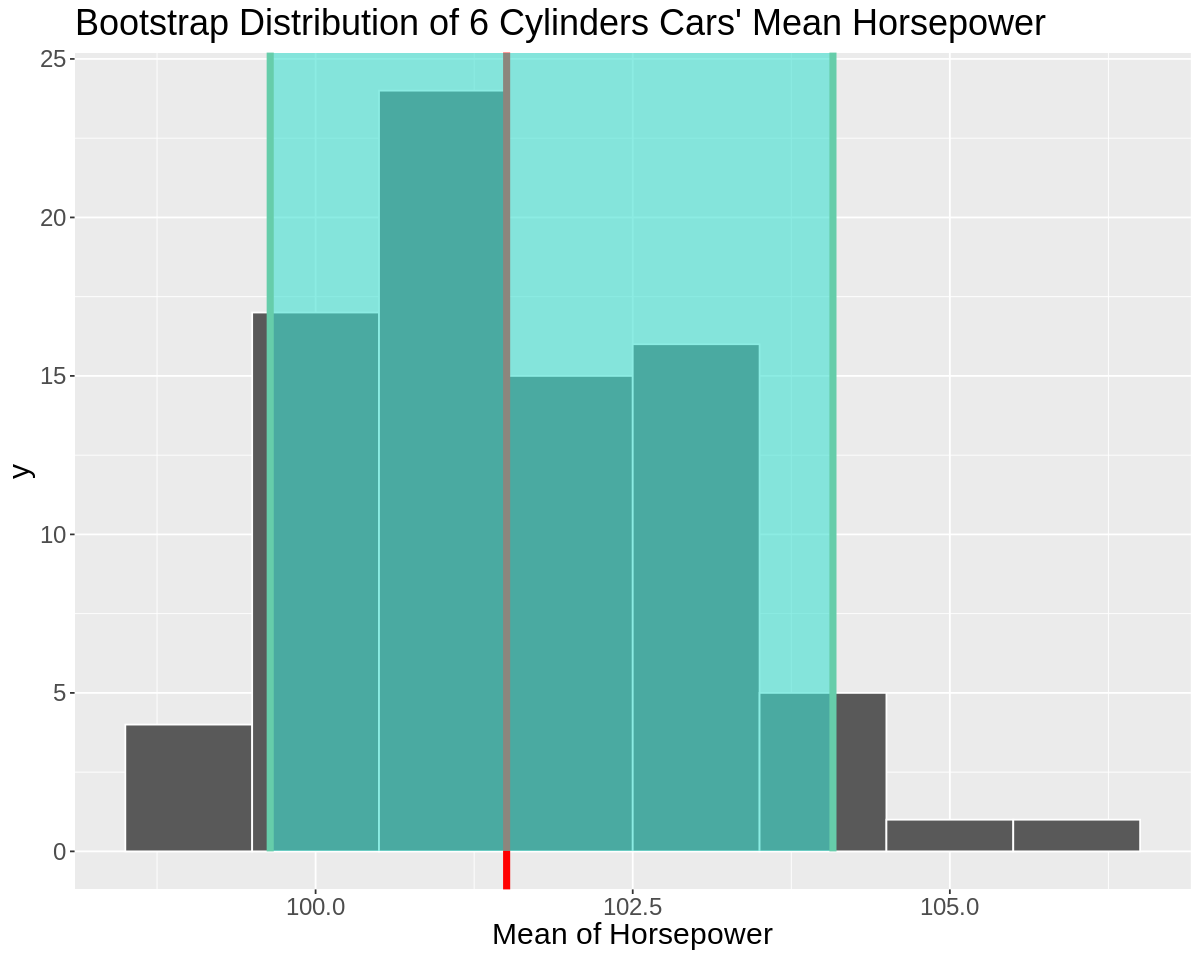

In [9]:
set.seed(1234)
options(repr.plot.width = 10, repr.plot.height = 8)

cars_bootstrapped2 <- cars_variables %>%
    filter(cylinders == "6") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 83) %>%
    calculate(stat = "mean")

cars_ci2 <- cars_bootstrapped2 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_6cylinders_plot <- cars_bootstrapped2 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_summ_hp[[2,3]], color = "red", size = 2) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 6 Cylinders Cars' Mean Horsepower") +
    theme(text = element_text(size = 18)) +
    shade_confidence_interval(endpoints = cars_ci2)

cars_6cylinders_plot

*Graph3: Bootstrap distribution of 6 cylinders cars mean horsepower*

In [10]:
cars_ci1

lower_ci,upper_ci
<dbl>,<dbl>
76.74724,79.90804


*Table 5: 90% Confidence interval of 4 Cylinders Cars' Mean Horsepower*

In [11]:
cars_ci2

lower_ci,upper_ci
<dbl>,<dbl>
99.64217,104.0783


*Table 6: 90% Confidence interval of 6 Cylinders Cars' Mean Horsepower*

## Hypothesis Testing ##
**Comparing the Means:** First, we need to indicate the two groups (two populations) are independent.

**Testing :** Two-Sample T-Test

**Test Statistic :** T Score

**1. Boxplot**

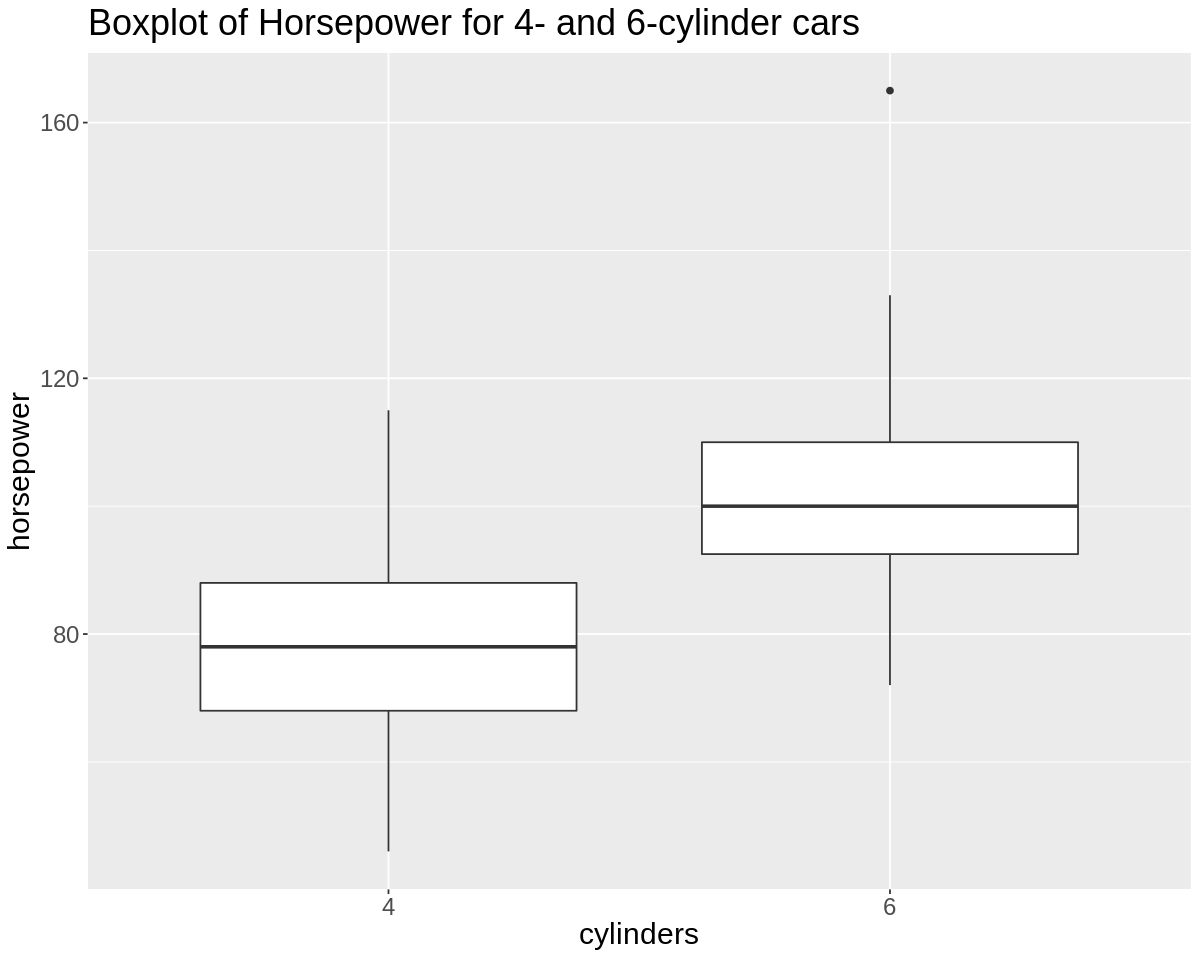

In [12]:
cars_boxplot

*Graph 1: Boxplot of horsepower for 4 and 6 cylinder cars*

The boxplot shows that the 6 cylinder cars' horsepower may be higher than 4 cylinder cars.

x_bar2 : mean horsepower of cars with 4 cylinders

x_bar1 : mean horsepower of cars with 6 cylinders

sd2 : standard deviation of cars with 4 cylinders

sd1 : standard deviation of cars with 6 cylinders

n2 : size of cars with 4 cylinders

n1 : size of cars with 6 cylinders

T = (x_bar2 - x_bar1)/sqrt(sd2^2/n2+sd1/n1)

**2. Summary Table**

In [13]:
cars_summ_hp

cylinders,size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,78.28141,14.52310,46,68.0,78,88,115
6,83,101.50602,14.31047,72,92.5,100,110,165


*Table 4: Table of Sample Size, Sample Means, Sample Standard deviations, and Quartiles* 

**3. Calculate The Test Statistic**

In [18]:
x_bar1 <- cars_summ_hp$mean[2]
x_bar2 <- cars_summ_hp$mean[1]
n1 <- cars_summ_hp$size[2]
n2 <- cars_summ_hp$size[1]
sd1 <- cars_summ_hp$sd[2]
sd2 <- cars_summ_hp$sd[1]
test_statistic <- (x_bar1 - x_bar2)/sqrt(sd1^2/n1+sd2^2/n2)

test_statistic

[1] 12.36604

**4.Degree of Freedom**

In [19]:
df <- (sd1^2/n1 + sd2^2/n2)^2/(sd1^4/(n1^2*(n1-1)) + sd2^4/(n2^2*(n2-1)))

df

[1] 155.6837

**5. Calculate the P-value**

Alternative Hypothesis:

6-cylinder engines have a greater horsepower than 4-cylinder engines (μ6-cyl − μ4-cyl > 0)

In [20]:
pt(test_statistic, df, lower.tail = FALSE)

[1] 3.331087e-25

**P-value is too small, we should reject H0 at any significance level.**

**6.Use t.test function**

In [21]:
tidy(
        t.test(x = cars_variables %>% 
               filter(cylinders == "6") %>% 
               pull(horsepower),
               y = cars_variables %>% 
               filter(cylinders == "4") %>% 
               pull(horsepower),
               alternative = "greater"))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
23.22462,101.506,78.28141,12.36604,3.331087e-25,155.6837,20.11693,Inf,Welch Two Sample t-test,greater


*Table 7: Table of The Summary of The Two-Sample T-Test We Did*

estimate1 : true mean horsepower of cars with 6 cylinders

estimate2 : true mean horsepower of cars with 4 cylinders